In [1]:
import pandas as pd
dataset = pd.read_csv('../Pre-Processing/data_cleaned.csv')

In [2]:
dataset.head(5)

,id,Title,Author,Supervisor,Degree,Department,Abstract,Date,URL
0,0,Effect of Acoustic perturbation on the Transit...,"Tiwari, Akhilesh S","Kumar, Sanjay",M.TECH.,AE,An experimental study of the effect of acousti...,2020,http://172.28.64.70:8080/jspui/handle/12345678...
1,1,Design of Graphene and Carbon Black Based Plan...,"Arora, Mayank","Akhtar, M Jaleel",M.TECH.,MSP,The application of attenuators in the RF and m...,2020,http://172.28.64.70:8080/jspui/handle/12345678...
2,2,Generative Models for Zero-Shot and Generalize...,"Verma, Vinay Kumar","Rai, Piyush",PH.D.,CSE,Zero-shot learning is the problem of learning ...,2020,http://172.28.64.70:8080/jspui/handle/12345678...
3,3,A NUMERICAL STUDY ON HYDRATE FORMATION AND DEP...,"Jat, Shashank S","Das, Malay K",M.TECH.,ME,Hydrate formation and deposition is a big chal...,2020,http://172.28.64.70:8080/jspui/handle/12345678...
4,4,Recrystallization As a Defect Healing Techniqu...,"Vishal, Utkarsh","Shekhar, Shashank",M.TECH.,MSE,"In the current world, the major focus is on th...",2020,http://172.28.64.70:8080/jspui/handle/12345678...


In [3]:
dataset.shape

(17311, 9)

In [4]:
dataset['word_count'] = dataset['Abstract'].apply(lambda x: len(str(x).split(" ")))
dataset[['Abstract','word_count']].head()

,Abstract,word_count
0,An experimental study of the effect of acousti...,280
1,The application of attenuators in the RF and m...,532
2,Zero-shot learning is the problem of learning ...,304
3,Hydrate formation and deposition is a big chal...,305
4,"In the current world, the major focus is on th...",503


In [5]:
dataset.word_count.describe()

count    17311.000000
mean       332.112241
std        325.421889
min         11.000000
25%        175.000000
50%        246.000000
75%        343.000000
max       8137.000000
Name: word_count, dtype: float64

In [6]:
#find 50 most frequent words in the dataset and delete them (stop_words)
freq = pd.Series(' '.join(dataset['Abstract']).split()).value_counts()[:50]
freq = list(freq.index)

In [7]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to C:\Users\Krishna
[nltk_data]     Mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Krishna
[nltk_data]     Mohan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [8]:
stop_words = set(stopwords.words("english"))

In [9]:
stop_words = stop_words.union(freq)
len(stop_words)

197

Perform Stemming + Lemmatisation

In [10]:
corpus = []
for i in range(0, dataset.shape[0]):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['Abstract'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  stop_words] 
    text = " ".join(text)
    
    corpus.append(text)

In [11]:
len(corpus)

17311

In [12]:
corpus[0]

'experimental effect acoustic perturbation evolution bluff wake five cylinder cross section conducted soap film tunnel cylinder projected area incoming conducted parameter acoustic perturbation include perturbation amplitude perturbation frequency perturbation location secondary street structure formation seen immediate downstream triangular rhomboid cylinder formation secondary street structure circular cylinder square cylinder inverted triangular cylinder within domain test section observed acoustic perturbation influence transition point primary street transforms secondary street triangular cylinder maximum shift transition point downstream upstream compared transition point location unperturbed high medium amplitude respectively similarly acoustic perturbation condition medium amplitude rhomboid cylinder maximum shift transition point downstream upstream respectively compared transition point location unperturbed strouhal number variation primary secondary wake perturbation frequen

In [13]:
dataset['Corpus'] = corpus

In [14]:
dataset.head(5)

,id,Title,Author,Supervisor,Degree,Department,Abstract,Date,URL,word_count,Corpus
0,0,Effect of Acoustic perturbation on the Transit...,"Tiwari, Akhilesh S","Kumar, Sanjay",M.TECH.,AE,An experimental study of the effect of acousti...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,280,experimental effect acoustic perturbation evol...
1,1,Design of Graphene and Carbon Black Based Plan...,"Arora, Mayank","Akhtar, M Jaleel",M.TECH.,MSP,The application of attenuators in the RF and m...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,532,application attenuator rf microwave frequency ...
2,2,Generative Models for Zero-Shot and Generalize...,"Verma, Vinay Kumar","Rai, Piyush",PH.D.,CSE,Zero-shot learning is the problem of learning ...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,304,zero shot learning problem learning classify o...
3,3,A NUMERICAL STUDY ON HYDRATE FORMATION AND DEP...,"Jat, Shashank S","Das, Malay K",M.TECH.,ME,Hydrate formation and deposition is a big chal...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,305,hydrate formation deposition big challenge ass...
4,4,Recrystallization As a Defect Healing Techniqu...,"Vishal, Utkarsh","Shekhar, Shashank",M.TECH.,MSE,"In the current world, the major focus is on th...",2020,http://172.28.64.70:8080/jspui/handle/12345678...,503,current world major focus designing material a...


In [15]:
dataset['word_count_corpus'] = dataset['Corpus'].apply(lambda x: len(str(x).split(" ")))

In [16]:
dataset[['Abstract', 'Corpus', 'word_count', 'word_count_corpus']].head()

,Abstract,Corpus,word_count,word_count_corpus
0,An experimental study of the effect of acousti...,experimental effect acoustic perturbation evol...,280,144
1,The application of attenuators in the RF and m...,application attenuator rf microwave frequency ...,532,328
2,Zero-shot learning is the problem of learning ...,zero shot learning problem learning classify o...,304,180
3,Hydrate formation and deposition is a big chal...,hydrate formation deposition big challenge ass...,305,178
4,"In the current world, the major focus is on th...",current world major focus designing material a...,503,282


In [17]:
dataset.describe()

,id,Date,word_count,word_count_corpus
count,17311.00000,17311.000000,17311.000000,17311.000000
mean,8655.00000,2001.931200,332.112241,189.730114
std,4997.39959,14.278118,325.421889,176.732467
min,0.00000,1965.000000,11.000000,6.000000
25%,4327.50000,1992.000000,175.000000,100.000000
50%,8655.00000,2006.000000,246.000000,144.000000
75%,12982.50000,2014.000000,343.000000,201.000000
max,17310.00000,2020.000000,8137.000000,4013.000000


In [20]:
!pip install wordcloud

BAG OF WORDS

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv = CountVectorizer(max_df=0.8, stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X = cv.fit_transform(corpus)

In [22]:
X

<17311x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 1894388 stored elements in Compressed Sparse Row format>

[Text(0, 0, 'method'),
 Text(0, 0, 'time'),
 Text(0, 0, 'problem'),
 Text(0, 0, 'work'),
 Text(0, 0, 'effect'),
 Text(0, 0, 'data'),
 Text(0, 0, 'analysis'),
 Text(0, 0, 'parameter'),
 Text(0, 0, 'thesis'),
 Text(0, 0, 'temperature'),
 Text(0, 0, 'one'),
 Text(0, 0, 'technique'),
 Text(0, 0, 'chapter'),
 Text(0, 0, 'high'),
 Text(0, 0, 'process'),
 Text(0, 0, 'number'),
 Text(0, 0, 'design'),
 Text(0, 0, 'found'),
 Text(0, 0, 'surface'),
 Text(0, 0, 'various'),
 Text(0, 0, 'obtained'),
 Text(0, 0, 'value'),
 Text(0, 0, 'structure'),
 Text(0, 0, 'case'),
 Text(0, 0, 'proposed')]

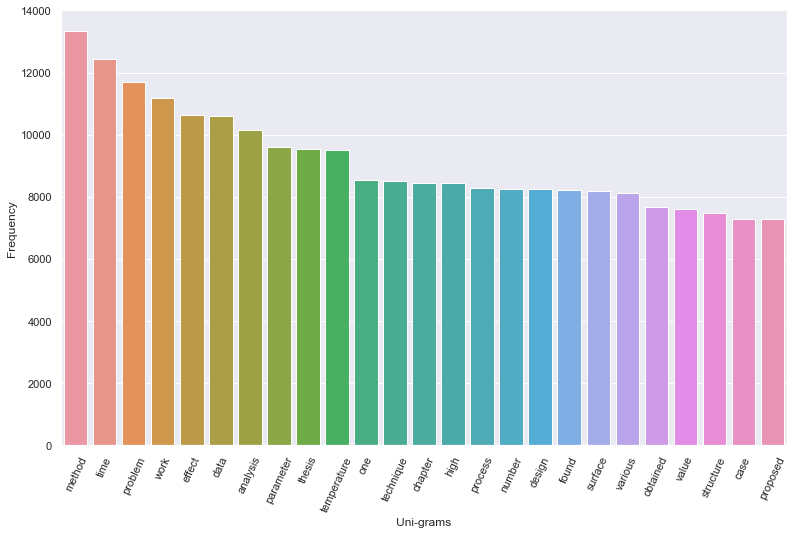

In [23]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=25)
top_df = pd.DataFrame(top_words)
top_df.columns=["Uni-grams", "Frequency"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Uni-grams", y="Frequency", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=65)

                 Bi-grams  Frequency
0           heat transfer       1634
1          finite element       1307
2         reynolds number       1228
3            attempt made       1088
4              non linear        937
5            steady state        919
6      boundary condition        905
7               thin film        859
8                   et al        858
9       experimental data        786
10  differential equation        693
11         neural network        671
12         boundary layer        670
13      three dimensional        651
14       high temperature        626
15    mechanical property        606
16              real time        605
17          cross section        573
18          mass transfer        573
19       room temperature        551
20           large number        549
21      temperature range        541
22         magnetic field        538
23             solar cell        534
24              power law        525


[Text(0, 0, 'heat transfer'),
 Text(0, 0, 'finite element'),
 Text(0, 0, 'reynolds number'),
 Text(0, 0, 'attempt made'),
 Text(0, 0, 'non linear'),
 Text(0, 0, 'steady state'),
 Text(0, 0, 'boundary condition'),
 Text(0, 0, 'thin film'),
 Text(0, 0, 'et al'),
 Text(0, 0, 'experimental data'),
 Text(0, 0, 'differential equation'),
 Text(0, 0, 'neural network'),
 Text(0, 0, 'boundary layer'),
 Text(0, 0, 'three dimensional'),
 Text(0, 0, 'high temperature'),
 Text(0, 0, 'mechanical property'),
 Text(0, 0, 'real time'),
 Text(0, 0, 'cross section'),
 Text(0, 0, 'mass transfer'),
 Text(0, 0, 'room temperature'),
 Text(0, 0, 'large number'),
 Text(0, 0, 'temperature range'),
 Text(0, 0, 'magnetic field'),
 Text(0, 0, 'solar cell'),
 Text(0, 0, 'power law')]

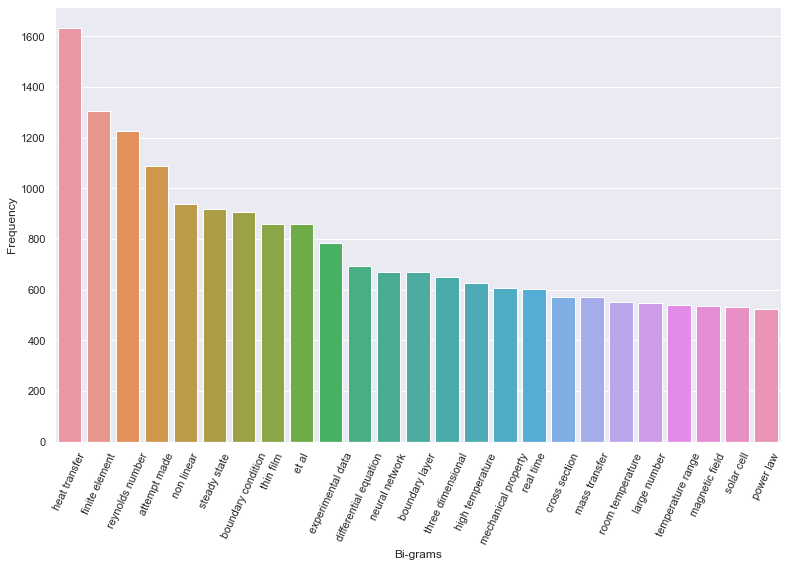

In [24]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=25)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-grams", "Frequency"]
print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-grams", y="Frequency", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=65)

                         Tri-grams  Frequency
0            finite element method        399
1              play important role        313
2           navier stokes equation        238
3     scanning electron microscopy        229
4        heat transfer coefficient        229
5          finite element analysis        205
6    partial differential equation        176
7        artificial neural network        172
8           boundary value problem        138
9        mass transfer coefficient        138
10              organic solar cell        137
11              second part thesis        134
12               work attempt made        133
13                 power law index        132
14                 power law fluid        131
15        finite difference method        128
16  ordinary differential equation        118
17             non newtonian fluid        115
18             ray diffraction xrd        115
19               first part thesis        114
20         electron microscopy sem

[Text(0, 0, 'finite element method'),
 Text(0, 0, 'play important role'),
 Text(0, 0, 'navier stokes equation'),
 Text(0, 0, 'scanning electron microscopy'),
 Text(0, 0, 'heat transfer coefficient'),
 Text(0, 0, 'finite element analysis'),
 Text(0, 0, 'partial differential equation'),
 Text(0, 0, 'artificial neural network'),
 Text(0, 0, 'boundary value problem'),
 Text(0, 0, 'mass transfer coefficient'),
 Text(0, 0, 'organic solar cell'),
 Text(0, 0, 'second part thesis'),
 Text(0, 0, 'work attempt made'),
 Text(0, 0, 'power law index'),
 Text(0, 0, 'power law fluid'),
 Text(0, 0, 'finite difference method'),
 Text(0, 0, 'ordinary differential equation'),
 Text(0, 0, 'non newtonian fluid'),
 Text(0, 0, 'ray diffraction xrd'),
 Text(0, 0, 'first part thesis'),
 Text(0, 0, 'electron microscopy sem'),
 Text(0, 0, 'thesis attempt made'),
 Text(0, 0, 'effect various parameter'),
 Text(0, 0, 'wireless sensor network'),
 Text(0, 0, 'linear stability analysis')]

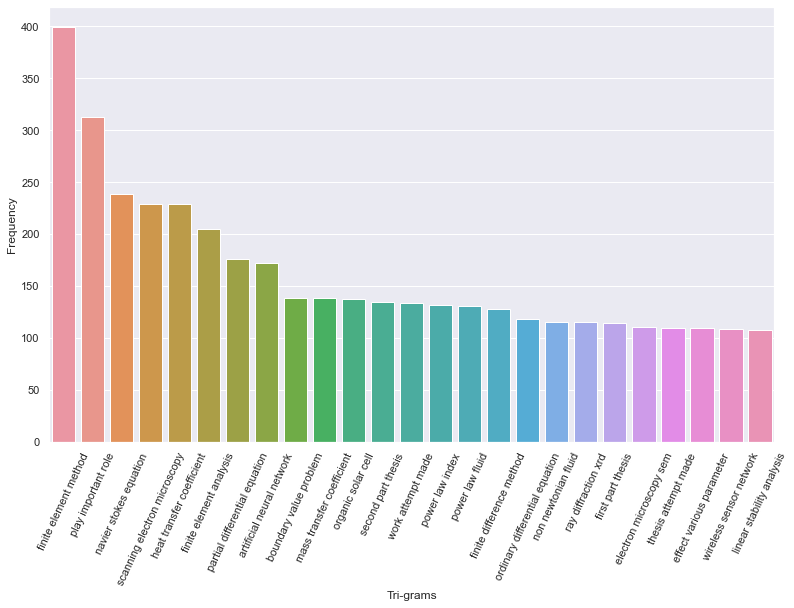

In [25]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=25)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-grams", "Frequency"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-grams", y="Frequency", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=65)

TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(X)
feature_names = cv.get_feature_names()
#feature_names

In [27]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn): 
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature, score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]] = score_vals[idx]
    
    return results

In [28]:
abstract_new = []
for i in range(len(corpus)):
  # fetch document for which keywords needs to be extracted
  doc = corpus[i]

  #generate tf-idf for the given document
  tf_idf_vector = tfidf_transformer.transform(cv.transform([doc]))

  #sort the tf-idf vectors by descending order of scores
  sorted_items = sort_coo(tf_idf_vector.tocoo())

  #extract only the top n
  keywords = extract_topn_from_vector(feature_names, sorted_items, 50)
  
  #now print the results
  abstract_new.append(list(keywords.keys()))

len(abstract_new)

17311

In [29]:
dataset['Abstract_Topn'] = abstract_new

In [30]:
dataset.head(10)

,id,Title,Author,Supervisor,Degree,Department,Abstract,Date,URL,word_count,Corpus,word_count_corpus,Abstract_Topn
0,0,Effect of Acoustic perturbation on the Transit...,"Tiwari, Akhilesh S","Kumar, Sanjay",M.TECH.,AE,An experimental study of the effect of acousti...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,280,experimental effect acoustic perturbation evol...,144,"[perturbation, cylinder, triangular, street, a..."
1,1,Design of Graphene and Carbon Black Based Plan...,"Arora, Mayank","Akhtar, M Jaleel",M.TECH.,MSP,The application of attenuators in the RF and m...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,532,application attenuator rf microwave frequency ...,328,"[microstrip, insertion, microstrip line, atten..."
2,2,Generative Models for Zero-Shot and Generalize...,"Verma, Vinay Kumar","Rai, Piyush",PH.D.,CSE,Zero-shot learning is the problem of learning ...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,304,zero shot learning problem learning classify o...,180,"[class, learning, generative, shot, deep, zero..."
3,3,A NUMERICAL STUDY ON HYDRATE FORMATION AND DEP...,"Jat, Shashank S","Das, Malay K",M.TECH.,ME,Hydrate formation and deposition is a big chal...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,305,hydrate formation deposition big challenge ass...,178,"[hydrate, gas, deposition, pipe, formation, an..."
4,4,Recrystallization As a Defect Healing Techniqu...,"Vishal, Utkarsh","Shekhar, Shashank",M.TECH.,MSE,"In the current world, the major focus is on th...",2020,http://172.28.64.70:8080/jspui/handle/12345678...,503,current world major focus designing material a...,282,"[material, recrystallization, ductility, stren..."
5,5,Development of a rapid soil testing tool for r...,"Ahmad, Ashar","Singh, Jayant K",M.TECH.,CHE,Rapid increase in population and decline in cu...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,278,rapid increase population decline cultivated l...,171,"[soil, nutrient, fertilizer, device, health, o..."
6,6,Sketch-Based Sketch Retrieval using Graph Conv...,"Jaiswal, Sristi","Namboodiri, Vinay P",M.TECH.,CSE,We have made great progress in the recognition...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,259,made great progress recognition generation ima...,145,"[sketch, graph, convolution, network, image, c..."
7,7,Optimal Hybrid Precoder Designs for the Linear...,"Raghubabu, Akarapu","Jagannatham, Aditya K",M.TECH.,EE,Internet of things (IoT) is the most prominent...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,259,internet thing iot prominent technology fth ge...,158,"[fusion center, sensor, fusion, constraint, sn..."
8,8,Discernment of the Induced Third Order Optical...,"Chaturvedi, Umang","Goswami, Debabrata",M.TECH.,CELP,This thesis presents the nonlinear optical beh...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,128,thesis present nonlinear optical behavior meth...,83,"[nonlinear, methanol, laser, third order, beam..."
9,9,Strain Engineering Ferroic Properties in Two-D...,"Mahajan, Akshay","Bhowmick, Somnath",M.TECH.,MSE,Two-dimensional (2D) ferroic materials have a ...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,208,dimensional ferroic material special place fam...,135,"[ferroelectric, material, strain, monolayer, f..."


In [32]:
dataset.drop(['word_count', 'Corpus', 'word_count_corpus'], axis=1, inplace=True)

In [33]:
dataset.columns

Index(['id', 'Title', 'Author', 'Supervisor', 'Degree', 'Department',
       'Abstract', 'Date', 'URL', 'Abstract_Topn'],
      dtype='object')

In [34]:
dataset.head(10)

,id,Title,Author,Supervisor,Degree,Department,Abstract,Date,URL,Abstract_Topn
0,0,Effect of Acoustic perturbation on the Transit...,"Tiwari, Akhilesh S","Kumar, Sanjay",M.TECH.,AE,An experimental study of the effect of acousti...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,"[perturbation, cylinder, triangular, street, a..."
1,1,Design of Graphene and Carbon Black Based Plan...,"Arora, Mayank","Akhtar, M Jaleel",M.TECH.,MSP,The application of attenuators in the RF and m...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,"[microstrip, insertion, microstrip line, atten..."
2,2,Generative Models for Zero-Shot and Generalize...,"Verma, Vinay Kumar","Rai, Piyush",PH.D.,CSE,Zero-shot learning is the problem of learning ...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,"[class, learning, generative, shot, deep, zero..."
3,3,A NUMERICAL STUDY ON HYDRATE FORMATION AND DEP...,"Jat, Shashank S","Das, Malay K",M.TECH.,ME,Hydrate formation and deposition is a big chal...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,"[hydrate, gas, deposition, pipe, formation, an..."
4,4,Recrystallization As a Defect Healing Techniqu...,"Vishal, Utkarsh","Shekhar, Shashank",M.TECH.,MSE,"In the current world, the major focus is on th...",2020,http://172.28.64.70:8080/jspui/handle/12345678...,"[material, recrystallization, ductility, stren..."
5,5,Development of a rapid soil testing tool for r...,"Ahmad, Ashar","Singh, Jayant K",M.TECH.,CHE,Rapid increase in population and decline in cu...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,"[soil, nutrient, fertilizer, device, health, o..."
6,6,Sketch-Based Sketch Retrieval using Graph Conv...,"Jaiswal, Sristi","Namboodiri, Vinay P",M.TECH.,CSE,We have made great progress in the recognition...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,"[sketch, graph, convolution, network, image, c..."
7,7,Optimal Hybrid Precoder Designs for the Linear...,"Raghubabu, Akarapu","Jagannatham, Aditya K",M.TECH.,EE,Internet of things (IoT) is the most prominent...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,"[fusion center, sensor, fusion, constraint, sn..."
8,8,Discernment of the Induced Third Order Optical...,"Chaturvedi, Umang","Goswami, Debabrata",M.TECH.,CELP,This thesis presents the nonlinear optical beh...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,"[nonlinear, methanol, laser, third order, beam..."
9,9,Strain Engineering Ferroic Properties in Two-D...,"Mahajan, Akshay","Bhowmick, Somnath",M.TECH.,MSE,Two-dimensional (2D) ferroic materials have a ...,2020,http://172.28.64.70:8080/jspui/handle/12345678...,"[ferroelectric, material, strain, monolayer, f..."


In [35]:
dataset.to_csv('Data_topn.csv')

Generate WordClouds based on department

In [36]:
print(dataset.shape)
len(corpus)

(17311, 10)


17311

In [37]:
#Create a dictionary where key will be department name, value will be list of dataset indices of articles in that department
department_dict = {} 
for i in range(dataset.shape[0]):
  if dataset['Department'][i] not in department_dict.keys(): #initialize department index list if first occurence of department
    department_dict[dataset['Department'][i]] = []
  department_dict[dataset['Department'][i]].append(i)      

In [38]:
department_dict.keys()

dict_keys(['AE', 'MSP', 'CSE', 'ME', 'MSE', 'CHE', 'EE', 'CELP', 'EEMP', 'CE', 'DP', 'IME', 'BSBE', 'CHM', 'HSS', 'ES', 'PHY', 'MATH & STATS', 'NETP', 'ECO', 'MME', 'NET', 'EEM', 'DES', 'LT', 'LTP', 'Civil'])

In [40]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# % matplotlib inline

In [41]:
def generate_wordcloud(keywords_dict):
  wordcloud = WordCloud(background_color='white',
                        stopwords=stop_words,
                        max_words=200,
                        max_font_size=50, 
                        random_state=42,
                        ).generate_from_frequencies(keywords_dict)
  print(wordcloud)
  fig = plt.figure(1)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

In [42]:
def word_cloud_dept(department):
  cv = CountVectorizer(max_df=0.8, stop_words=stop_words, max_features=10000)
  corpus_dept = []
  for i in range(dataset.shape[0]):
    if dataset['Department'][i] == department:
      corpus_dept.append(dataset['Abstract'][i])

  X = cv.fit_transform(corpus_dept)

  tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
  tfidf_transformer.fit(X)
  feature_names = cv.get_feature_names()

  keywords_dict = {}
  for i in range(len(corpus_dept)):
    doc = corpus_dept[i]
    tf_idf_vector = tfidf_transformer.transform(cv.transform([doc]))
    sorted_items = sort_coo(tf_idf_vector.tocoo())
    keywords = extract_topn_from_vector(feature_names, sorted_items, 50)
    keywords_dict.update(keywords)

  generate_wordcloud(keywords_dict)  

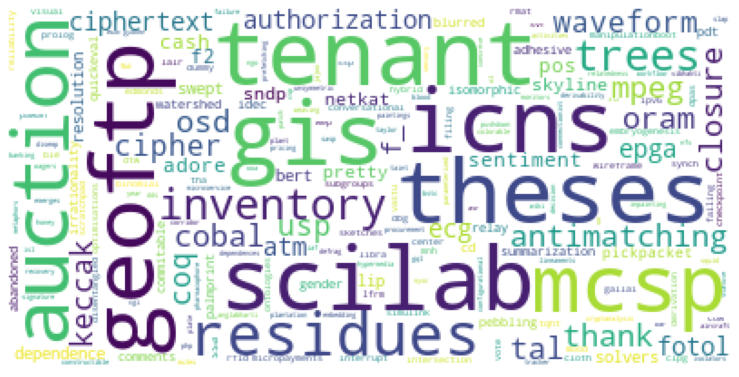

In [43]:
word_cloud_dept('CSE')

In [45]:
def word_cloud_sup(supervisor):
  cv = CountVectorizer(max_df=0.8, stop_words=stop_words, max_features=10000)
  corpus_sup = []
  for i in range(dataset.shape[0]):
    if dataset['Supervisor'][i] == supervisor:
      corpus_sup.append(dataset['Abstract'][i])

  X = cv.fit_transform(corpus_sup)

  tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
  tfidf_transformer.fit(X)
  feature_names = cv.get_feature_names()

  keywords_dict = {}
  for i in range(len(corpus_sup)):
    doc = corpus_sup[i]
    tf_idf_vector = tfidf_transformer.transform(cv.transform([doc]))
    sorted_items = sort_coo(tf_idf_vector.tocoo())
    keywords = extract_topn_from_vector(feature_names, sorted_items, 50)
    keywords_dict.update(keywords)

  generate_wordcloud(keywords_dict)  

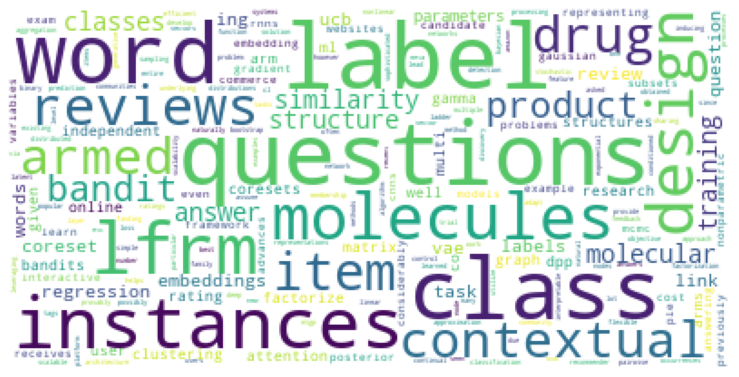

In [48]:
# word_cloud_sup('Bhattacharya, Arnab')
word_cloud_sup('Rai, Piyush')

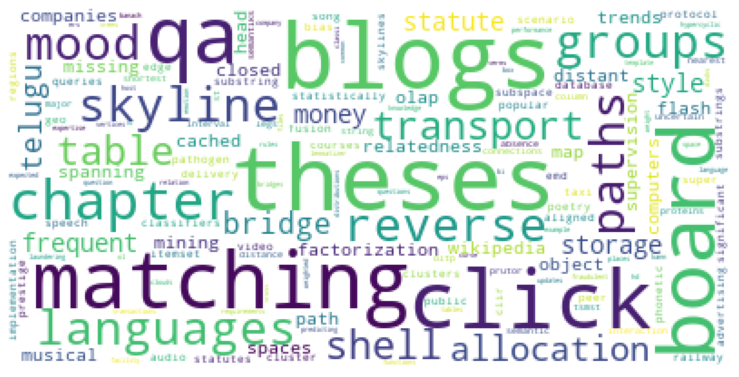

In [47]:
word_cloud_sup('Bhattacharya, Arnab') #based on corpus (reduced words)